# Simple moving average crossover

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
import webbrowser as web


In [3]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import ATR
from util.SMA import SMA
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
from SMA_crossover import SMA_crossover

## Get Data

In [4]:
XAUUSD = load_data()

In [5]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

In [6]:
strategy = SMA_crossover

In [7]:
account_size = 20000

# Backtest each time frame

## TF D1

In [8]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/2000, )
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                    0.694031
Equity Final [$]                  19998.06745
Equity Peak [$]                  20016.353225
Return [%]                          -0.009663
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                   -0.000483
Volatility (Ann.) [%]                0.048614
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.184746
Avg. Drawdown [%]                   -0.097218
Max. Drawdown Duration     3827 days 00:00:00
Avg. Drawdown Duration     1340 days 00:00:00
# Trades                                   26
Win Rate [%]                             50.0
Best Trade [%]                       1.298639
Worst Trade [%]                     -1.168618
Avg. Trade [%]                    

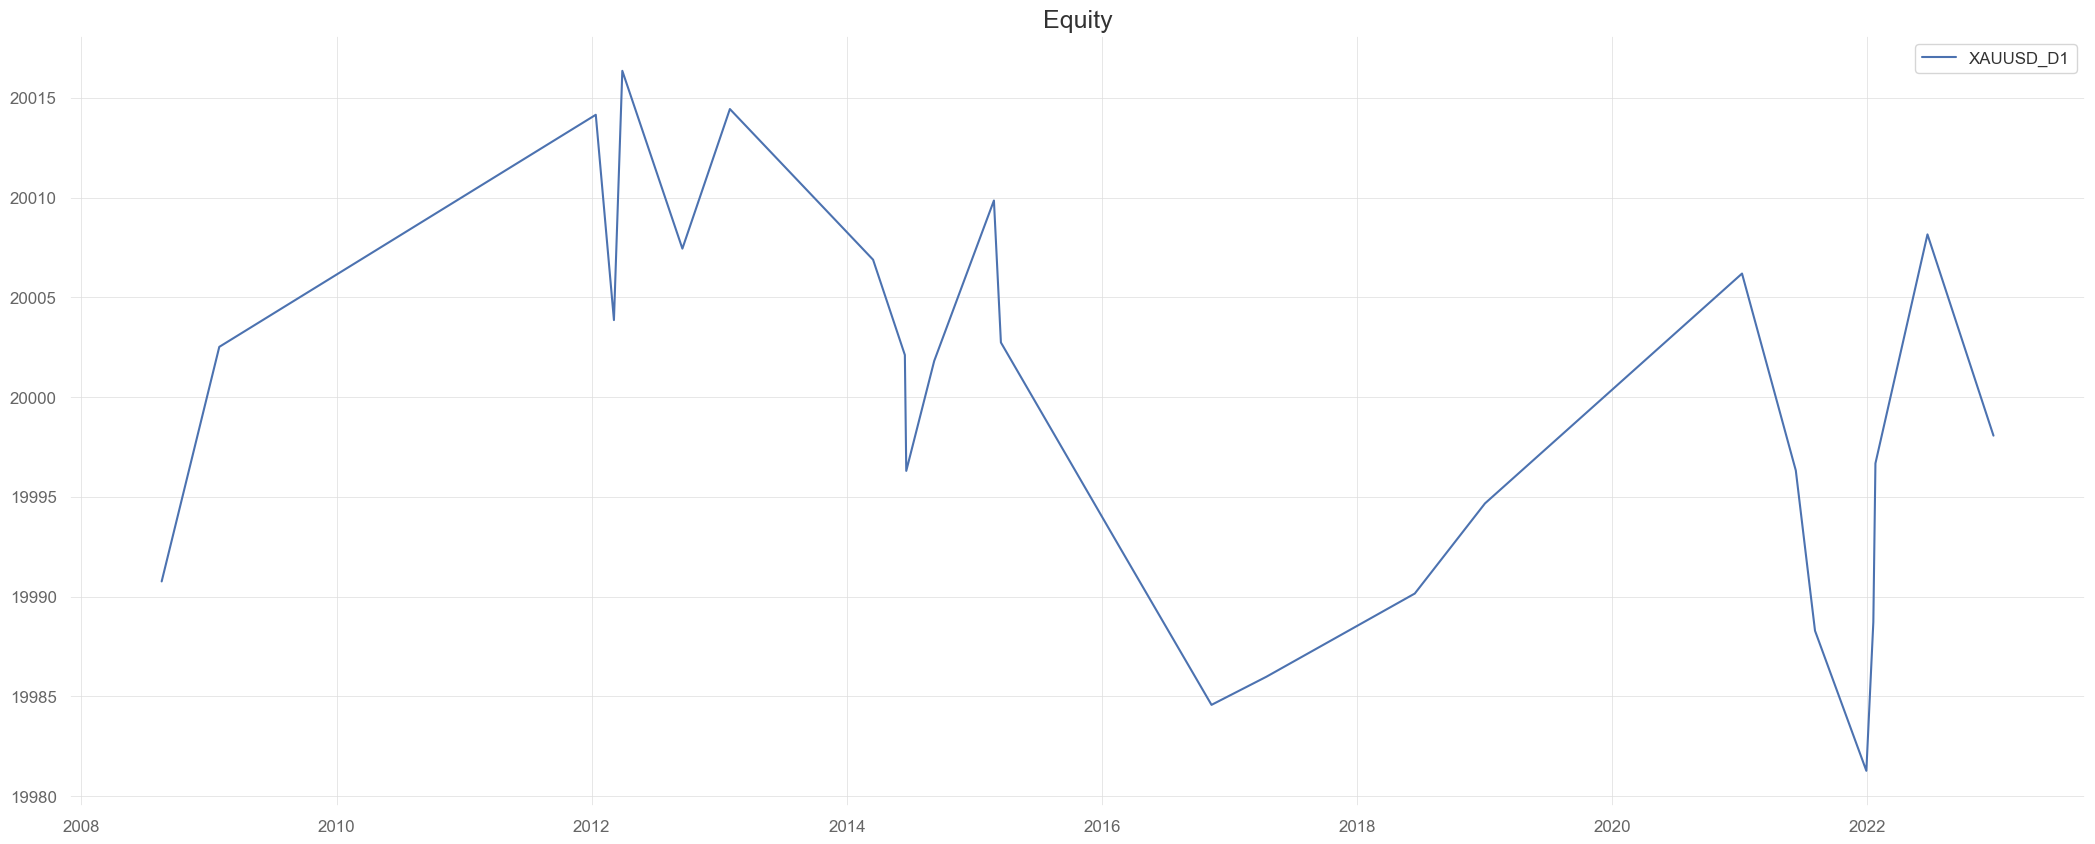

In [9]:
plot_equity_trades(result_D1['_trades'],'XAUUSD_D1' , account_size)

In [35]:
xauusd_df = pd.DataFrame(XAUUSD['D1'], columns=['Close'])

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2008-08-18   2008-08-18
End Period                 2023-03-10   2023-03-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       1.0%

Cumulative Return          135.87%      -0.01%
CAGR﹪                     4.15%        -0.0%

Sharpe                     0.39         -0.01
Prob. Sharpe Ratio         94.93%       48.27%
Smart Sharpe               0.39         -0.01
Sortino                    0.54         -0.01
Smart Sortino              0.54         -0.01
Sortino/√2                 0.38         -0.01
Smart Sortino/√2           0.38         -0.01
Omega                      0.98         0.98

Max Drawdown               -44.85%      -0.18%
Longest DD Days            3259         3827
Volatility (ann.)          15.37%       0.05%
R^2                        0.0          0.0
Information Ratio          -0.02        -0.02
Calmar           

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2012-09-17,2022-01-17,2023-03-10,3827,-0.184746,-0.151737
2,2012-03-05,2012-03-05,2012-03-28,24,-0.060707,NaN


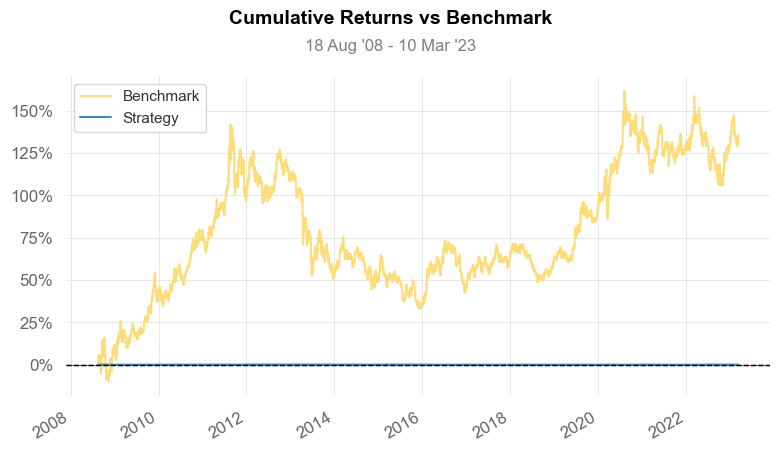

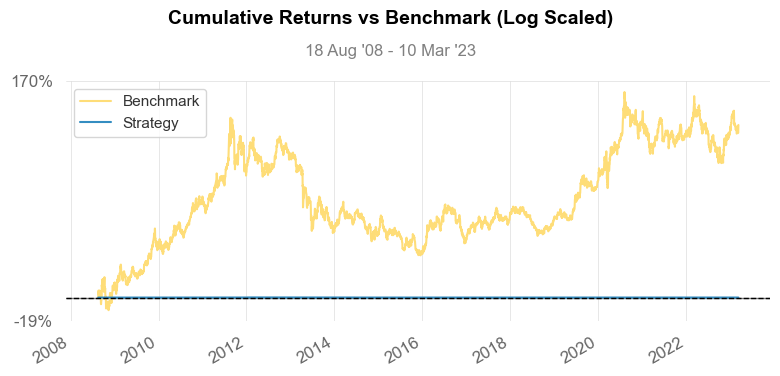

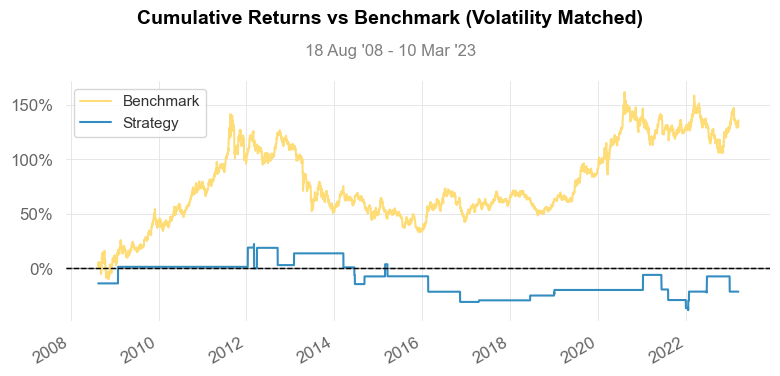

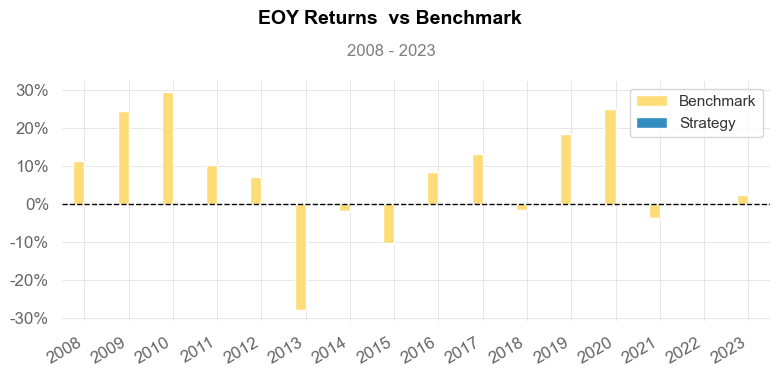

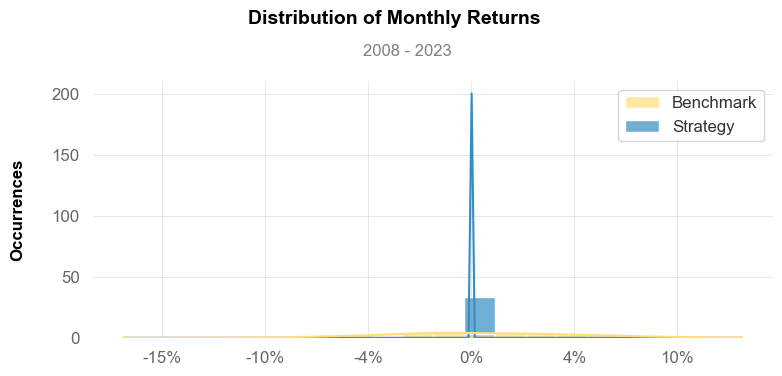

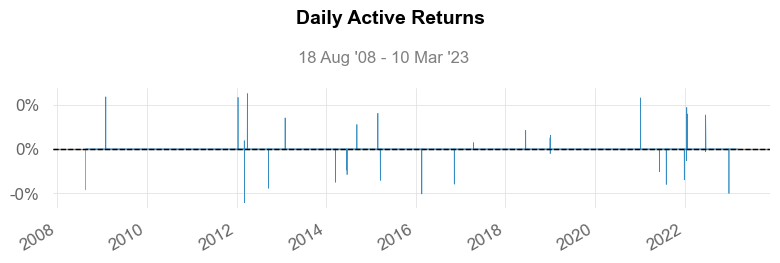

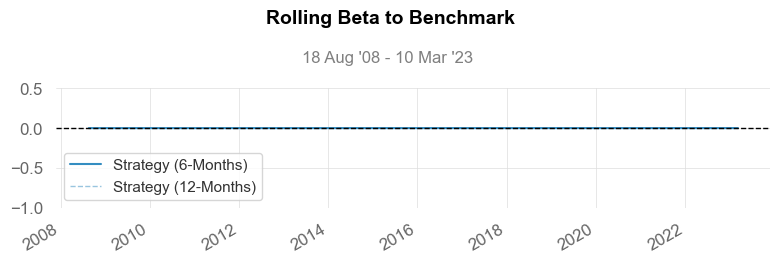

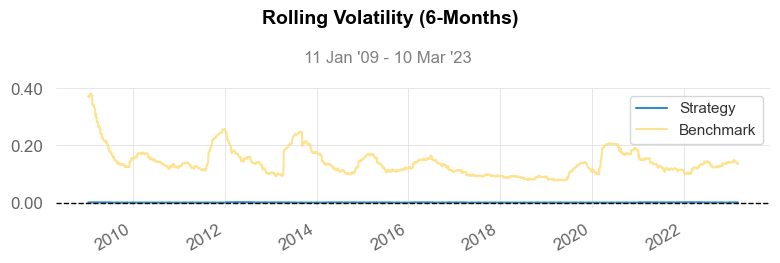

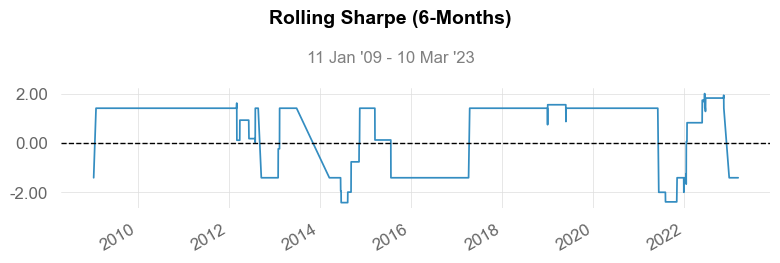

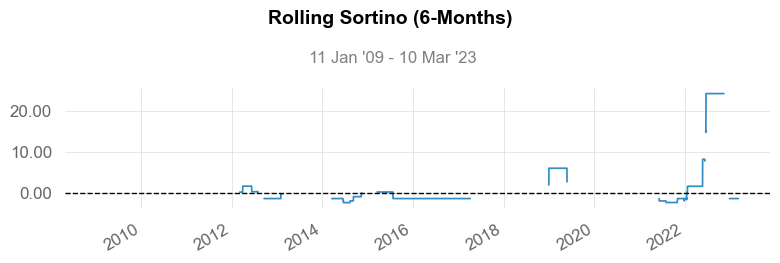

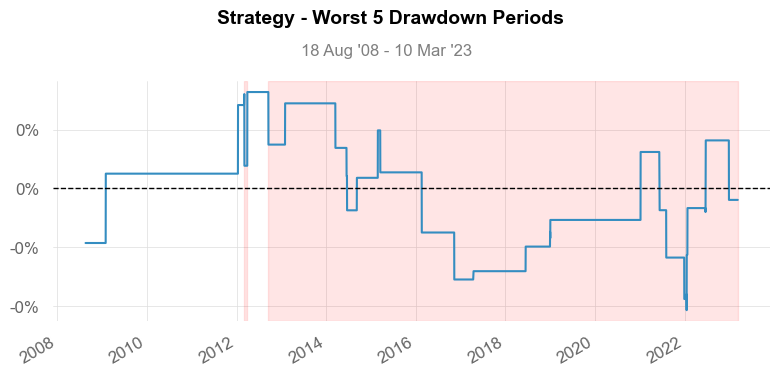

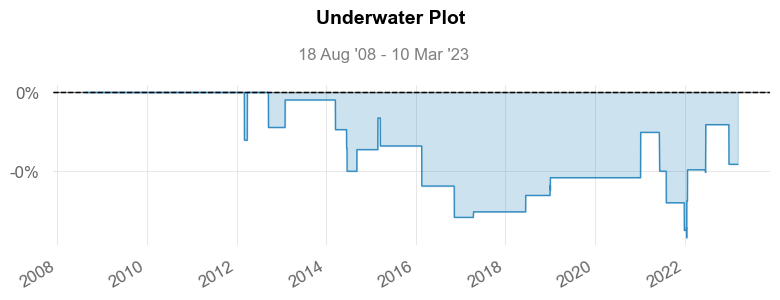

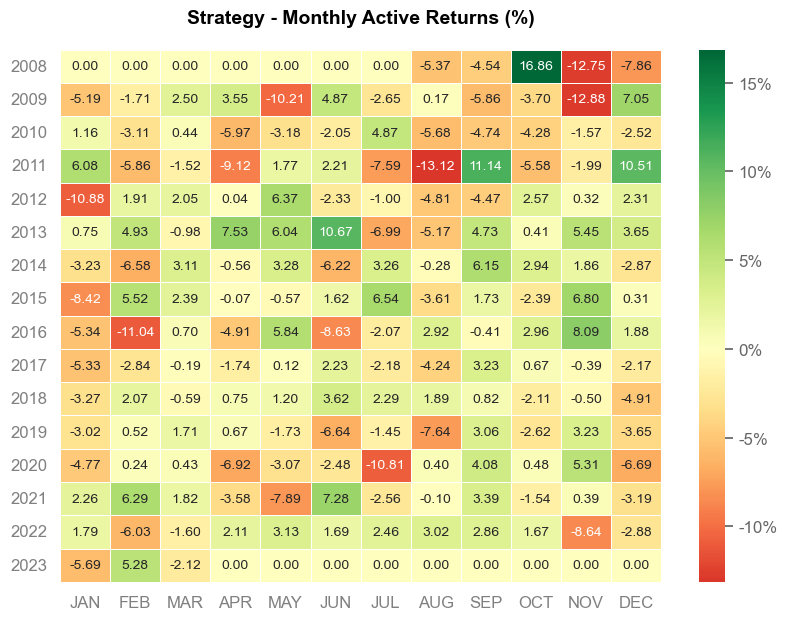

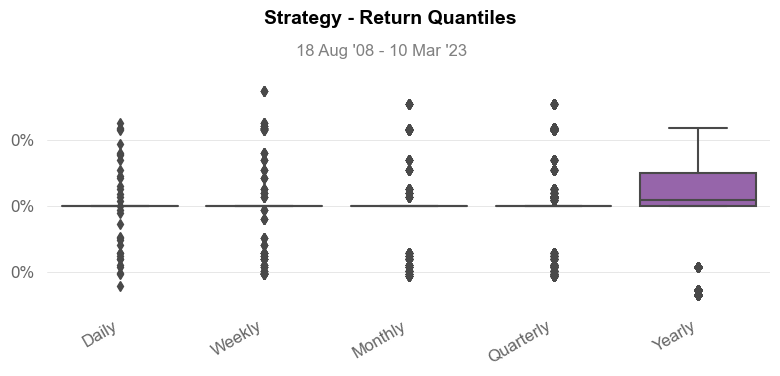

In [36]:
equity_curve = result_D1['_equity_curve']
equity_df = pd.DataFrame(equity_curve, columns=['Equity'])
equity_df['returns'] = equity_df['Equity'].pct_change().fillna(0)
qs.reports.full(equity_df['Equity'],benchmark=xauusd_df['Close'])

## TF H4

In [9]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size, margin=1/2000, )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                    1.000924
Equity Final [$]                 19967.233175
Equity Peak [$]                  20019.419575
Return [%]                          -0.163834
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                   -0.008193
Volatility (Ann.) [%]                0.058583
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                    -0.41505
Avg. Drawdown [%]                   -0.094703
Max. Drawdown Duration     2933 days 08:00:00
Avg. Drawdown Duration      790 days 16:00:00
# Trades                                  161
Win Rate [%]                        50.931677
Best Trade [%]                       0.785551
Worst Trade [%]                      -1.26882
Avg. Trade [%]                    

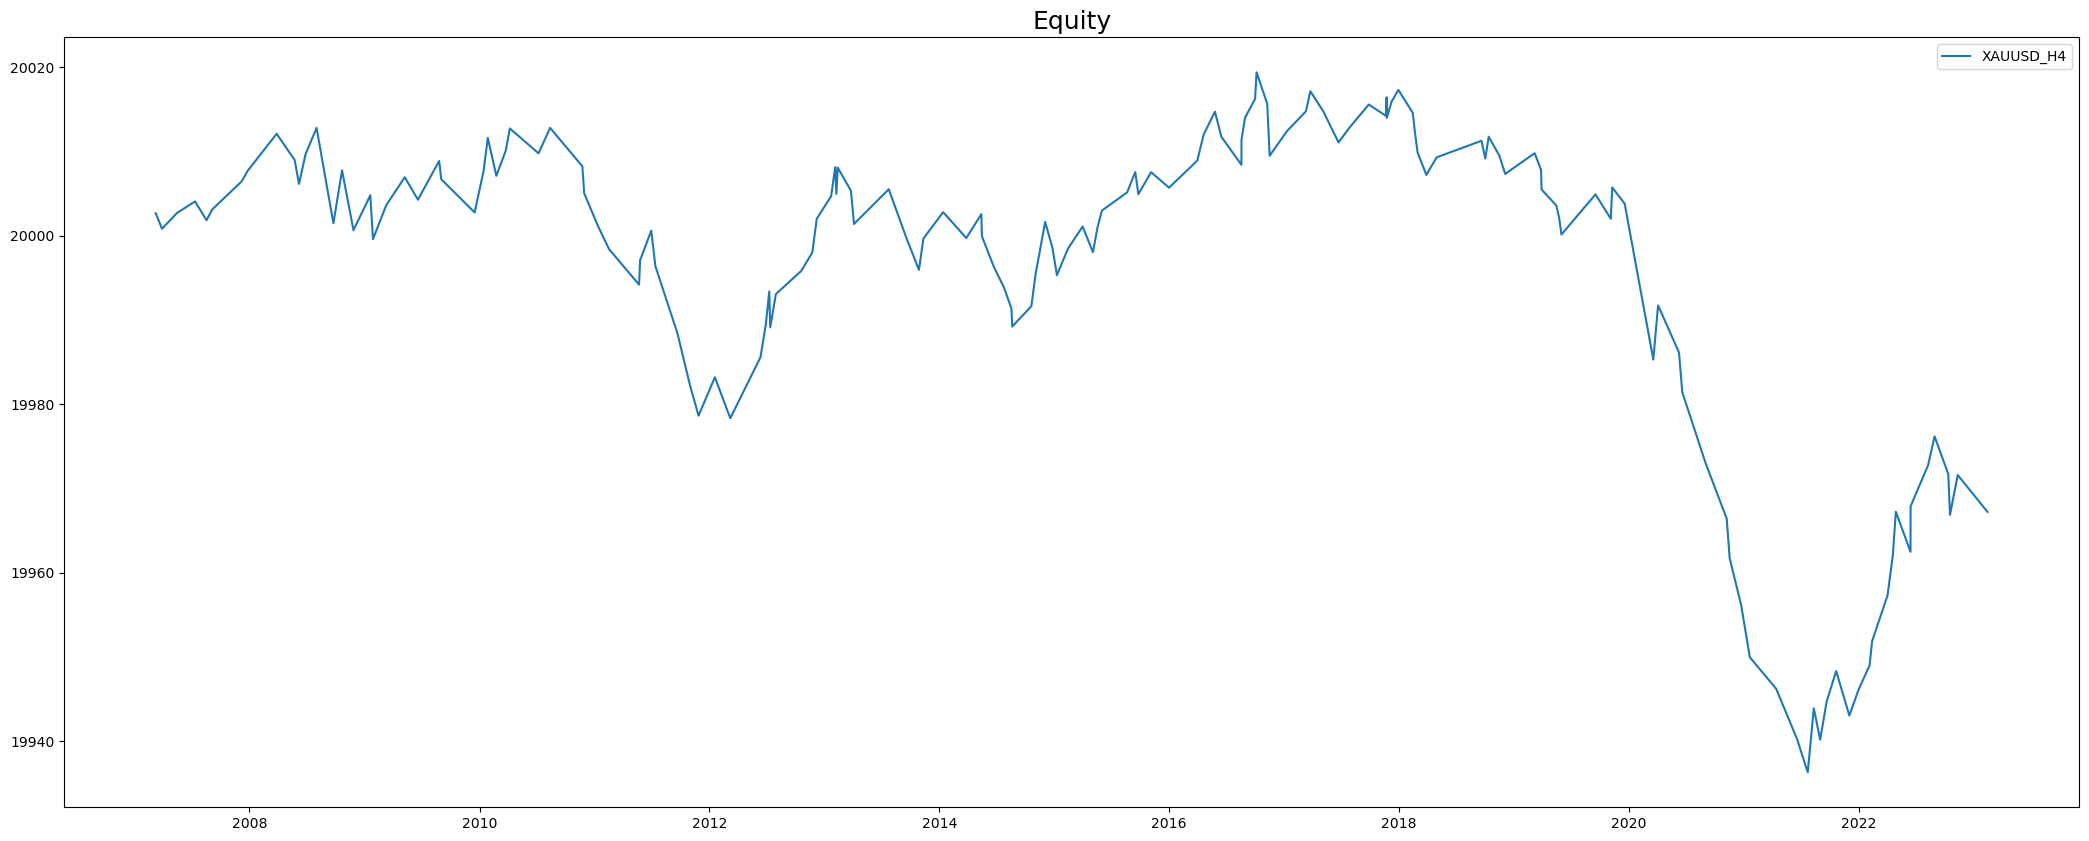

In [10]:
plot_equity_trades(result_H4['_trades'], 'XAUUSD_H4' , account_size)

## TF H1

In [33]:
Backtest_H1 = Backtest(XAUUSD['H1'], strategy,
                       cash=account_size, margin=1/2000, )
result_H1 = Backtest_H1.run()
result_H1

KeyboardInterrupt: 

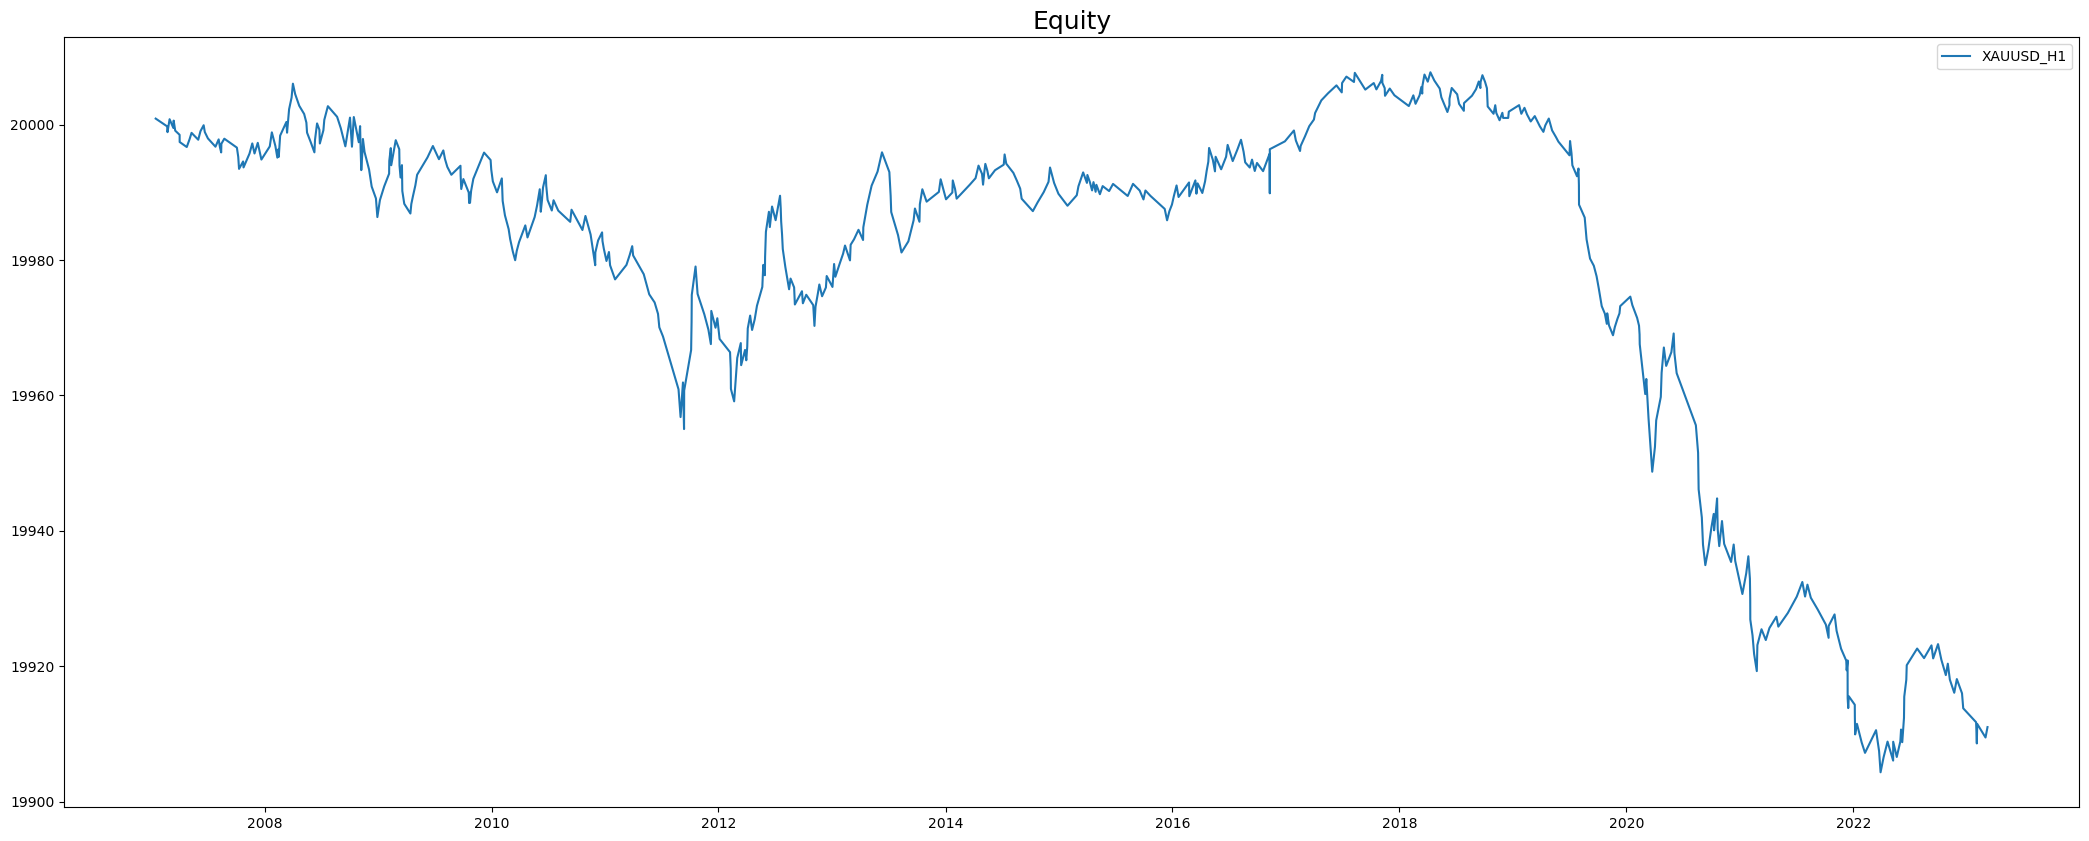

In [ ]:
plot_equity_trades(result_H1['_trades'], 'XAUUSD_H1', account_size)

## TF M30 

In [32]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size, margin=1/2000, )
result_M30 = Backtest_M30.run()
result_M30

KeyboardInterrupt: 

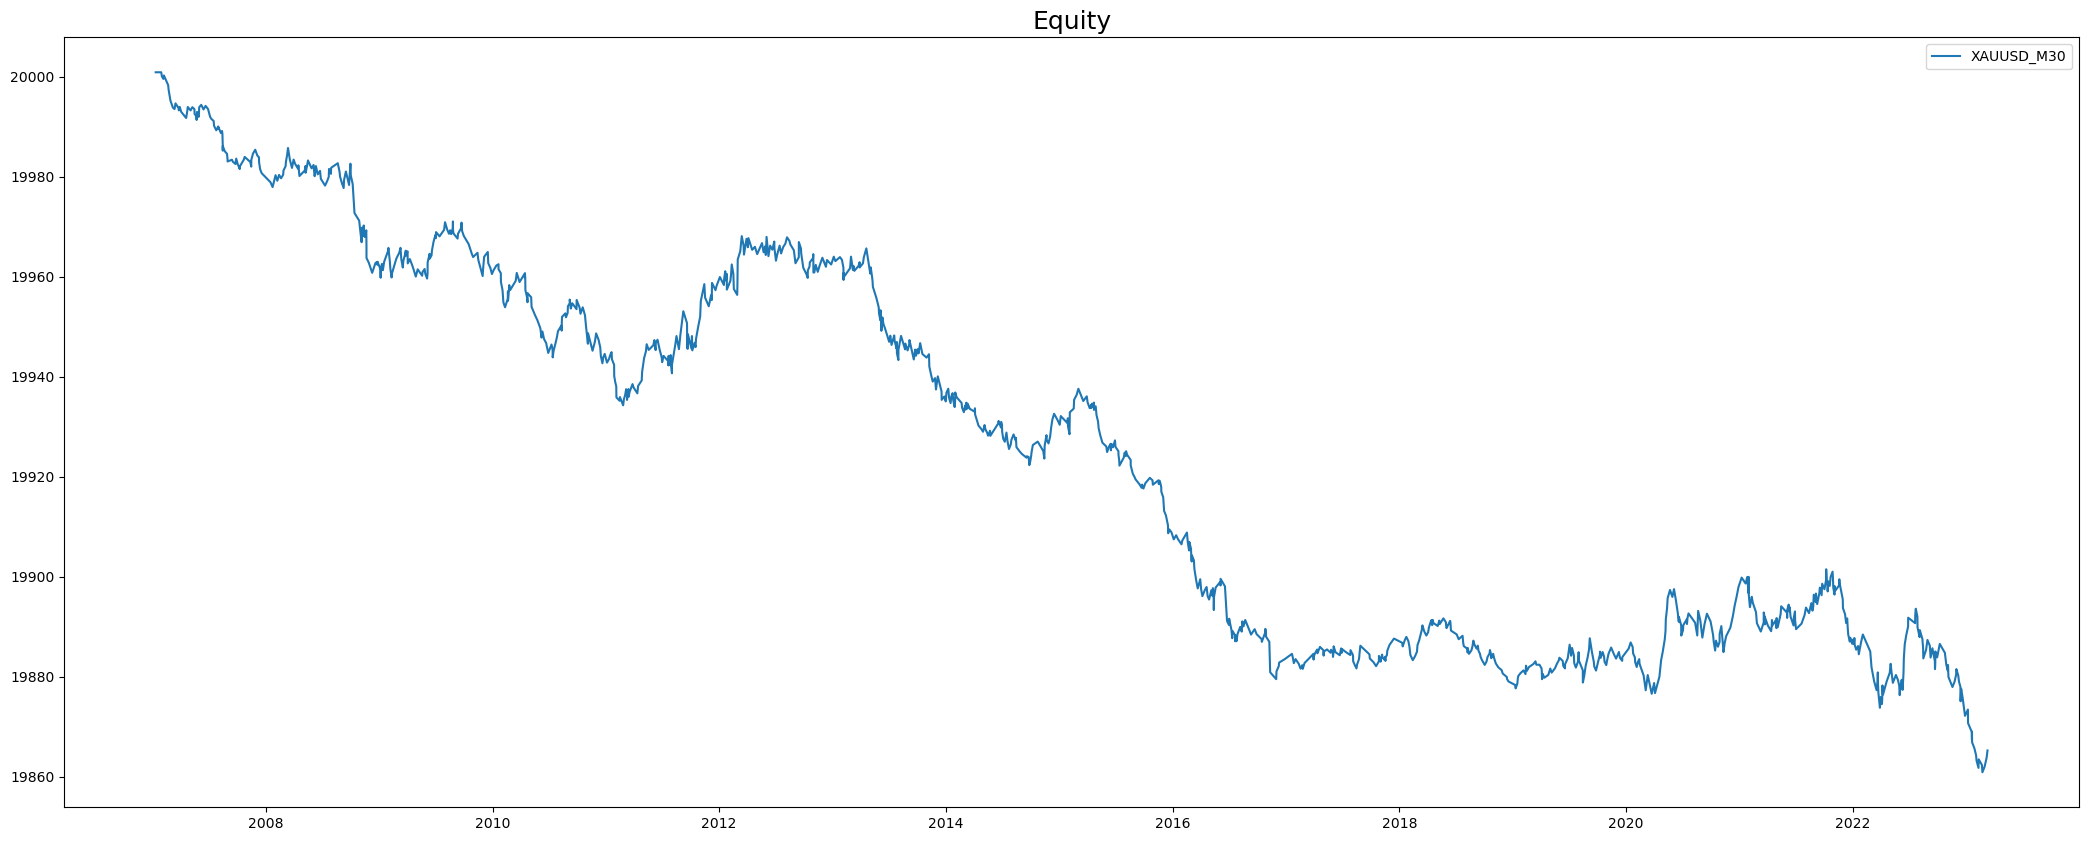

In [ ]:
plot_equity_trades(result_M30['_trades'], 'XAUUSD_M30', account_size)